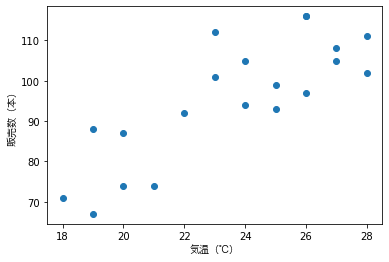

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import csv
import matplotlib.font_manager as fm

f = open('score.csv')

dx = []
dy = []

for row in csv.reader(f):
    dx.append(int(row[0]))
    dy.append(int(row[1]))

f.close()

fp = fm.FontProperties(fname='/System/Library/Fonts/Hiragino Sans GB.ttc', size=10)

plt.xlabel('気温（℃）', fontproperties=fp)
plt.ylabel('販売数（本）', fontproperties=fp)

plt.scatter(dx, dy)
plt.show()

In [2]:
# 初期値
a = 0.0    # 直線の傾き
b = 0.0    # 切片

# 差の二乗和
min_res = 0.0
for i in range(20):
    y = a * dx[i] + b
    min_res += (dy[i]-y)**2
print(min_res)

187050.0


In [3]:
import numpy as np

# データ
# 気温
dx = np.array([28, 26, 28, 27, 27, 20, 26, 22, 23, 19, 26, 23, 25, 21, 20, 18, 24, 19, 24, 25])
# 販売数
dy = np.array([111, 97, 102, 105, 108, 74, 116, 92, 112, 88, 116, 101, 93, 74, 87, 71, 94, 67, 105, 99])

# 初期値
a = 0.0    # 直線の傾き
b = 0.0    # 切片

# 差の二乗和
y = a * dx + b
min_res = np.sum((dy-y)**2)
print(min_res)

187050.0


In [4]:
import random

for i in range(100000):
    # 傾きと切片の更新量を決定
    if i < 10000:
        wa = (random.random() - 0.5) * 0.5
        wb = (random.random() - 0.5) * 0.5
    elif i < 30000:
        wa = (random.random() - 0.5) * 0.01
        wb = (random.random() - 0.5) * 0.01
    else:
        wa = (random.random() - 0.5) * 0.001
        wb = (random.random() - 0.5) * 0.001
        
    # 差の二乗和
    res = 0
    for j in range(20):
        y = (a + wa) * dx[j] + (b + wb)
        res += (dy[j] - y) ** 2
        
    # 値の更新
    if res < min_res:
        min_res = res
        a = a + wa
        b = b + wb
            
print(a, b, min_res)

3.821715761954837 5.598592286590522 1444.667012179384


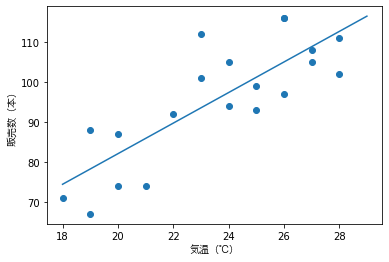

In [5]:
# 回帰直線
def func(x):
    return a * x + b

# 直線用のデータ
x = np.arange(18, 30)
y = func(x)

# 表示
plt.scatter(dx, dy)
plt.plot(x, y)
plt.xlabel('気温（℃）', fontproperties=fp)
plt.ylabel('販売数（本）', fontproperties=fp)
plt.show()

In [6]:
y = func(35)
y

139.35864395500982

In [7]:
import sympy as sp
sp.init_printing()

x, y = sp.symbols('x, y')
x1 = 28;  y1 = 111
x2 = 25;  y2 = 99
y = ((y2-y1)/(x2-x1))*(x-x1)+y1
y

/Users/daiki/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/daiki/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/daiki/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/daiki/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:12

In [9]:
# データ
# 気温
dx = np.array([28, 26, 28, 27, 27, 20, 26, 22, 23, 19, 26, 23, 25, 21, 20, 18, 24, 19, 24, 25])
# 販売数
dy = np.array([111, 97, 102, 105, 108, 74, 116, 92, 112, 88, 116, 101, 93, 74, 87, 71, 94, 67, 105, 99])

# 初期値
a = 4.0    # 直線の傾き
b = -1.0    # 切片

# 最初の直線とのずれ
min_res = 0.0
for i in range(20):
    y = a * dx[i] + b
    min_res += (dy[i]-y)**2
print(' ずれの初期値: {0}'.format(min_res))

for i in range(200000):
    # 傾きと切片の更新量を決定
    wa = (random.random() - 0.5) * 0.001
    wb = (random.random() - 0.5) * 0.001
        
    # 差の二乗和
    res = 0
    for j in range(20):
        y = (a + wa) * dx[j] + (b + wb)
        res += (dy[j] - y) ** 2
        
    # 値の更新
    if res < min_res:
        min_res = res
        a = a + wa
        b = b + wb
            
print('a: {0}, b: {1}, min_res: {2}'.format(a, b, min_res))

 ずれの初期値: 1566.0
a: 3.821715416377625, b: 5.5986022614096775, min_res: 1444.6670121793238


In [10]:
import numpy as np

# データ
# 気温
dx = np.array([28, 26, 28, 27, 27, 20, 26, 22, 23, 19, 26, 23, 25, 21, 20, 18, 24, 19, 24, 25])
# 販売数
dy = np.array([111, 97, 102, 105, 108, 74, 116, 92, 112, 88, 116, 101, 93, 74, 87, 71, 94, 67, 105, 99])

# 回帰直線を求める
a, b = np.polyfit(dx, dy, 1)
print('a: {0}, b: {1}'.format(a, b))

a: 3.821715470329103, b: 5.598600673749644
